# Feature Engineering and Data Preparation

### What is feature engineering?

Feature engineering is a process of using domain knowledge to extract features from raw data via data mining techniques.

### Three general approaches

- Extracting Information
- Combining Information
- Transforming Information

### Extracting Information

Let's say we have a dataset with date and timestamp details, generally machine learning model can't interpret these formats.
So, we expand this data into different columns/features.

If the data format is yyyy-mm-dd hh-mm-ss, we can extract extra the following features from this information:
year, month, date, weekday or weekend, day etc. depending on the kind of data we are looking at.

### Combining Information

In the previous section, we have done this already by combining the advertising cost spent on TV, radio, and newspaper and created a new column called total_spend.
Also, while working on polynomial regression, the interacting features multiply with each other. It's also combining two or more features.

We can also combine extracted information. For example, while dealing with some datetime feature, if we consider night life on weekend days impact our result, we can take up the extracted information from the datetime feature and create a new feature which says if the given time is night time on a weekend day or not.

### Transforming Information

Very common for string data

Most algorithms cannot accept string data(as they can't perform mathematical operations on text)

Often categorical data is present as a string data. So, we need transform it.

There are two main approaches to transform categorical data:
- Integer Encoding
- One-hot Encoding (Dummy Variables)

**Integer Encoding:** For Integer encoding we directly convert our categorical values into integers. For example, if we have feature which has data of country names like USA, India, South Africa etc. we can directly convert USA to 1, India to 2, and South Africa to 3. Every Country should have a unique integer value assigned to it.
If we are talking about some cases like positions in olympics, it might make sense if those assigned variables are positions in some sport. It also works for all kinds of ordinal variable values, like if the data has information like bad, average, good, excellent.
But, If the data is Nominal i.e. when you can't sort the data, like some kind of location information where there is no proper mathematical relationship between two countries, our machine learning algorithm will consider that there is some kind of linear relationship between these countries, as it won't understand that these numbers represent country names.
So, for some features this may not make sense depending on the feature and domain.

Pros:
- Very easy to do and udnerstand, you just have to map the integers to the categorical values.
- It does not increase the no. of features.

Cons:
- Implies ordered relationship between categories.

**One-hot Encoding:** Convert each category into individual features that are either 0 or 1. For example, if we have some data relating to the locations and country feature is present in it with country names USA, India, and South Africa. We can convert these countries into individual columns/features and if the row has country = USA, USA column will have value 1 and other columns derived from the country column will have zeroes.

*Dummy Variable trap*: It is mathematically known as multi-collinearity. If we are dealing with a binary category, which has data like UP and DOWN. After creating two dummy features as UP and DOWN, the new columns has duplicate information with inverted encoding i.e. if the value of UP is 1, DOWN is 0 and vice-versa. So, there is no need to have one of those features in this case. Similarly, if there are n no. of features, we only require only (n-1) no. of features. Generally, after creating the dummy features the first/last feature is dropped.


If our categorical column has two categories we have to create two columns with their names, in that case if one category feature has value 1 the other one will have 0, and vice-versa, that means zero in one column automatically represent 1 in the other column, so we can drop one of the two columns. Similarly, if there are three features, if two of those features is equal to zero, it means third one is 1, even if we drop them we know that it will be one. So, for a column with n no. of categorical values we can create (n-1) categorical columns using One-hot encoding.
However, we greatly expand our feature set in this process.

We can try to reduce this feature column expansion by creating higher level categories. In our example, if we divide the countries based on their continents, if we have 195 countries in our countries column instead of creating 194 features, we can narrow it down to 7 continents thereby getting 6 higher level features. This may require a lot of tuning and domain experience to choose reasonable higher level categories or mappings.

Pros:
- No ordering implied.

Cons:
- Potential to create many more features columns and coefficients.
- Dummy variable trap consideration.
- Not easy to add new categories.
    - For example, as we discussed previously if our categorical column had data like UP and DOWN, and we got a new categorical data as LEFT. To add this to our machine learning model, we have edit the feature set by adding a new column/feature.

##### Feature Engineering in general will always be data and domain dependent.

## Dealing with Outliers

### Outlier Considerations

**Defining an Outlier**
- Range and Limits
- Percentage of Data

Both are domain dependant!

There is no one size fits all solution and sometimes, it would make sense to even retain the outliers if they represent the upcoming future information.

**Range and Limits**

How do we actually decide the Range and Limits in our data to declare them as outliers?

We need to decide what will constitute an outlier with some methodology:
- InterQuartile Range
- Standard Deviation
- Visualized or Domain Limit Value

    In our box plots, we considered the Fence for outliers to be 1.5times the IQR as it a common practice. But, depending on the distribution of the data, you may want to change this no. from 1.5 to 2 or whatever fits your data distribution.

    You can also define this outliers on standard deviation like, anything outside the 3 std or 2 std is considered as an outlier.
    
    You can also visualize the data and set a domain limit and spot the outliers in the data. This is not fully mathematical, but based on domain knowledge and/or visualizations.
    
**Percentage of Data**

- If a large percentage of your data is being labeled as outlier, then you actually have a wide distribution, not outliers!

    So, you shouldn't be using a methodology that suddenly labels 10% of data points as outliers. It might be a wider distribution of your data or inputs of future data, rather than just a lot of outliers.

    Better limit your outliers to a few percentage points at most.

It's extremely important to utilize visualization plots to be able see and identify outliers points.

This will create caveats for the future model. For example, you have trained your model based on house prices below 10 million dollars and removing the houses priced above 10 million dollars considering them to be outliers. Now your model is not suitable for predicting prices for house below 10 million dollars but not above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create a function to prepare a random normal distribution of ages

def create_ages(mu = 50, sigma = 13, num_samples = 100, seed = 42):
    """
    mu --> mean
    sigma --> standard_deviation
    num_samples --> no. of samples
    seed --> random_state
    """
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc = mu, scale = sigma, size = num_samples)
    
    sample_ages = np.round(sample_ages, decimals = 0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

<AxesSubplot:ylabel='Count'>

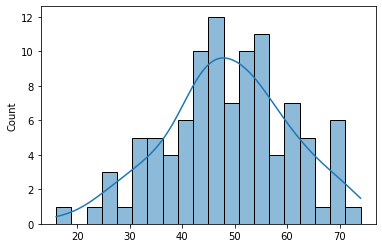

In [5]:
sns.histplot(data = sample, bins = 20, kde=True)

# This is a randomly generated data, even if our real world data looks like this, we cannot simply say that everything below 20 is an outlier or everything above 70 is an outlier.
# We need a robust methodolody to define the outliers.

### InterQuartile Range

<AxesSubplot:>

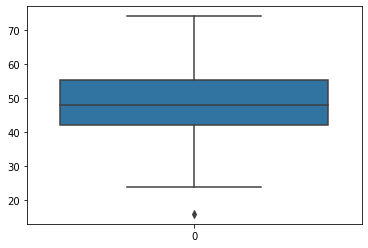

In [6]:
sns.boxplot(data = sample)

<AxesSubplot:>

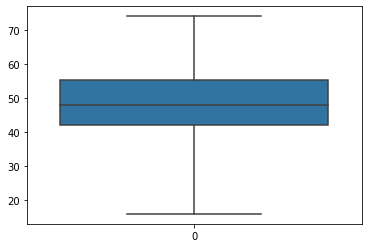

In [7]:
# The previous box plot is considering fence to 1.5 times the IQR as it is generally followed.
# We want to restrict our fence based on a specific condition, we also do that.
# 'whis' parameter represents the plot whiskers. It will define our fence to show the outliers.
# If we give 2 to it.

sns.boxplot(data = sample, whis=2)

# There are no outliers now.

In [8]:
# We can extract the numbers of related to the boxplots

ser = pd.Series(sample)

ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

From the above data...

- 25 percentile is at 42
- 50 percentile or median is at 48
- 75 percentile is at 55.25

In [9]:
# To get IQR

IQR = 55.25 - 42

# If we are considering whis = 1.5

lower_limit = 42.0 - 1.5*(IQR)

upper_limit = 55.25 + 1.5*(IQR)

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

Lower limit: 22.125
Upper limit: 75.125


In [10]:
# Don't have to type it manually by checking the output of describe method.

# Syntax: np.percentile(array_name, x_percentile)
# Syntax: np.percentile(array_name, [x_percentile, y_percentile, z_percentile...])

np.percentile(sample, 75)

55.25

In [11]:
np.percentile(sample, [75, 25])

array([55.25, 42.  ])

In [12]:
# You can extract the values from the output

q75, q25 = np.percentile(sample, [75, 25])

In [13]:
q75

55.25

In [14]:
iqr = q75 - q25
iqr

13.25

In [15]:
print("upper limit:", q75 + 1.5*(iqr))
print("lower limit:", q25 - 1.5*(iqr))

upper limit: 75.125
lower limit: 22.125


In [16]:
# To get the outliers

ser[ser<lower_limit]

74    16.0
dtype: float64

In [17]:
ser[ser>upper_limit]

Series([], dtype: float64)

### Based on Standard Deviation

In [18]:
# Let's create a function to plot the data based on standard deviation

def std_plot(series, num_of_std):
    """
    Provide a series/array to plot
    """
    series = pd.Series(series)
    sigma = series.std()
    m = series.mean()
    d = {}
    l = m - num_of_std*sigma
    u = m + num_of_std*sigma
    d[f'below {num_of_std} std'] = series[series<l]
    d[f"above {num_of_std} std"] = series[series>u]
    
    sns.kdeplot(series)
    plt.axvline(x = l, color = 'red', label = 'Lower limit')
    plt.axvline(x = u, color = 'green', label = "Upper limit")
    plt.legend(loc = (1.05, 0.5))
    
    return d

{'below 2 std': 13    25.0
 37    25.0
 74    16.0
 79    24.0
 dtype: float64,
 'above 2 std': 31    74.0
 dtype: float64}

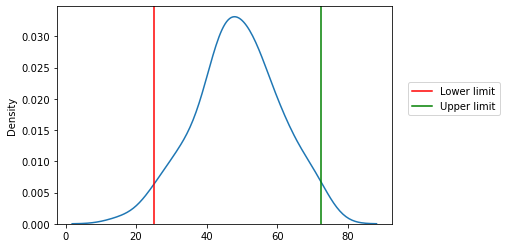

In [19]:
std_plot(series = ser, num_of_std=2)

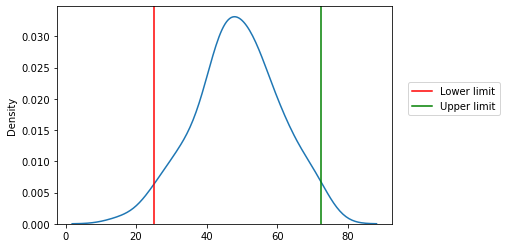

In [20]:
output = std_plot(series = ser, num_of_std=2)

In [21]:
below_std = output['below 2 std']
above_std = output['above 2 std']

In [22]:
below_std

13    25.0
37    25.0
74    16.0
79    24.0
dtype: float64

In [23]:
above_std

31    74.0
dtype: float64

### Visualized or Domain Limit Value

In [24]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [25]:
pd.set_option('display.max_columns', None)   # to get n no. of columns pass the value of n, or None to get all the columns
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
# Our label is SalePrice Column
# Let's see the correlation between the label and different features

df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

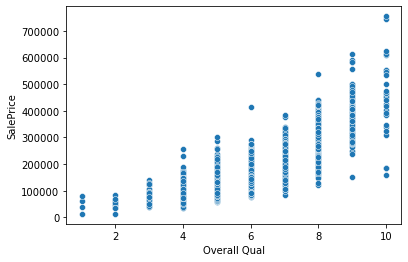

In [27]:
# Overall Quality has highest correlation in the given features

sns.scatterplot(x = "Overall Qual", y = "SalePrice", data = df)

# Since the quality ratings present in the column are natural numbers till 10

- There is good correlation between Overall Qual and Sale price, the graph looks like there is a linear relationship between these two columns
- So, there is nothing wrong when the rating is high and the price is high.
- But, if the rating is high and price is very low and if they are not following the overall pattern, we can consider them to be outliers

<a href="https://imgbb.com/"><img src="https://i.ibb.co/2FJ1Qjv/Outliers.png" alt="Outliers" border="0"></a>

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

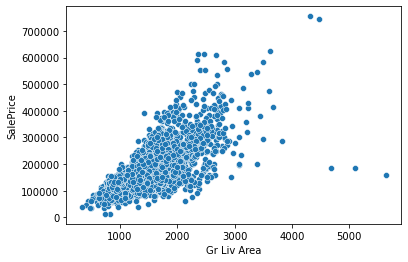

In [28]:
# There is good correlation between "SalePrice" and "Gr Liv Area" column also

sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", data = df)

# Similarly here, there are three houses with very high Gr Liv Area and low Sale Price. Since there is a positive correlation between these two columns, we can consider the bottom values to the outliers.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/WkLL9MN/Outliers-02.png" alt="Outliers-02" border="0"></a>

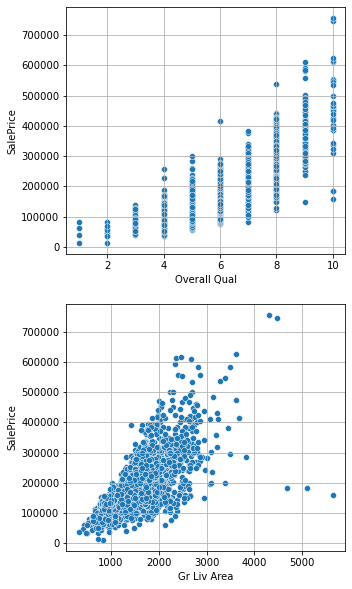

In [29]:
# After visualizing and spotting these data points, we can extract them and drop them.

fig, ax = plt.subplots(nrows =2, ncols = 1, figsize = (5, 10))

ax1 = ax[0]
ax2 = ax[1]

sns.scatterplot(x = "Overall Qual", y = "SalePrice", ax = ax1, data = df)
sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", ax = ax2, data = df)
ax1.grid()
ax2.grid()

In [30]:
# From the above plots

df[(df['SalePrice']<200000) & (df['Overall Qual']>8)]

# there are four point, but we could see three points as two of those points are overlapping

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,TA,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [31]:
df[(df['SalePrice']<200000) & (df['Gr Liv Area']>4000)]

# There are three points as we have seen in the plot

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [32]:
# For both the features there are common outliers

drop_ind = df[(df['SalePrice']<200000) & (df['Overall Qual']>8)].index

# Let's drop all the four index values.

df = df.drop(index = drop_ind)

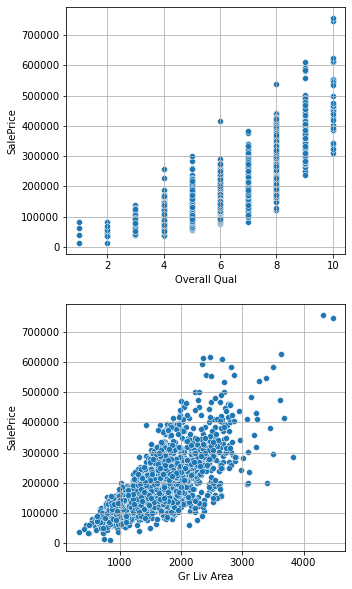

In [33]:
# Let's check our previous plots once again

fig, ax = plt.subplots(nrows =2, ncols = 1, figsize = (5, 10))

ax1 = ax[0]
ax2 = ax[1]

sns.scatterplot(x = "Overall Qual", y = "SalePrice", ax = ax1, data = df)
sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", ax = ax2, data = df)
ax1.grid()
ax2.grid()

## Dealing with Missing Data

### Finding the missing data

In [34]:
# With a good dataset, we always get another file with Feature_Description

with open("../DATA/Ames_Housing_Feature_Description.txt") as f:
    print(f.read())

# We can the name of the feature, its general description, and if the feature is categorical what are the categories present in it.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [35]:
df.isnull().sum()[df.isnull().sum() > 0]

# This doesn't give the relative data for us

Lot Frontage       489
Alley             2728
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2914
Fence             2354
Misc Feature      2821
dtype: int64

In [36]:
# Let's create simple function

def percent_missing(df):
    percent_nan = df.isnull().sum()
    percent_nan = percent_nan[percent_nan>0]
    percent_nan = 100*percent_nan/len(df)
    percent_nan = percent_nan.sort_values()
    return percent_nan

In [37]:
percent_nan = percent_missing(df)

In [38]:
percent_nan

# Pool QC has more than 99 percent of missing data, it can mean that the data has not been entered or more than 99 percent of the houses don't have a pool to give the Quality Rating.

Electrical         0.034176
Garage Area        0.034176
Total Bsmt SF      0.034176
Bsmt Unf SF        0.034176
BsmtFin SF 1       0.034176
BsmtFin SF 2       0.034176
Garage Cars        0.034176
Bsmt Full Bath     0.068353
Bsmt Half Bath     0.068353
Mas Vnr Area       0.786056
Mas Vnr Type       0.786056
BsmtFin Type 1     2.734108
Bsmt Qual          2.734108
Bsmt Cond          2.734108
BsmtFin Type 2     2.768284
Bsmt Exposure      2.836637
Garage Type        5.365687
Garage Finish      5.434040
Garage Qual        5.434040
Garage Cond        5.434040
Garage Yr Blt      5.434040
Lot Frontage      16.712235
Fireplace Qu      48.598770
Fence             80.451128
Alley             93.233083
Misc Feature      96.411483
Pool QC           99.589884
dtype: float64

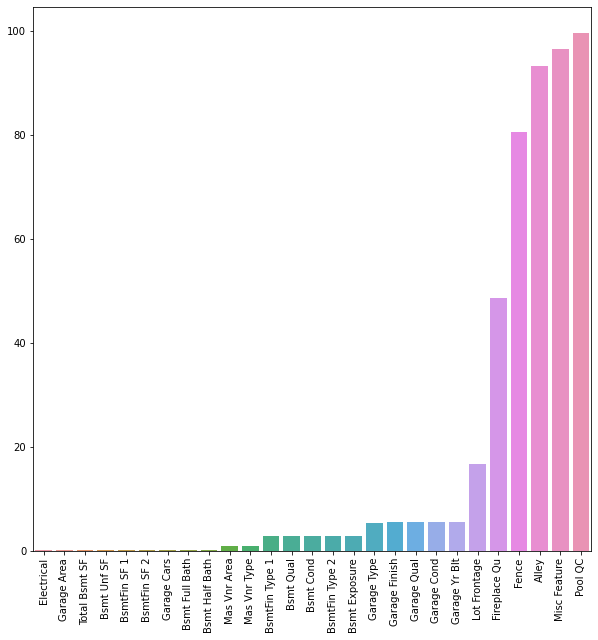

In [39]:
plt.figure(figsize = (10, 10))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

# We found what data is missing and how much data is missing. Now, let's check what do we do about it

There are two ways of dealing with these missing values:
- Easy way
- Hard way

**Easy way**:
- Set a threshold to drop the rows if the missing value percent is below the threshold percent. For example, if our threshold percent for rows is 10, we will find columns with missing values and if the total no. of missing values in few of the columns is less than 10% then we will drop all those rows.
- Set a threshold to drop the columns if the missing value percent is above threshold. For example, if our threshold is 90%, drop all the columns with missing values more than 90%.
- For the rest of features with missing values.
    - If the features are continous, replace all those values with a proper aggregate function on that particular column like mean value of that column.
    - If the features are categorical, replace all those values with a proper aggregate function on that particular column like mode value of that column.

This process is purely mathematical, if we decide the threshold values for dropping rows and columns our work is done. This process doesn't need much domain knowledge and IT IS NOT A GOOD WAY OF DOING IT. By dropping some rows, we are missing some data, by dropping features, we are not training our model on those features, in future if we get these features that has ability to change output drastically, our model can't perform it well.

For example, when we are working with some house price prediction data, 99% of the houses in the data won't be having swimming pools, so if all of those are having null values in the feature swimming pool and we drop that feature, our model won't be trained on that feature and we know that swimming at house will change the price of the house dractically. Now, when we give an input of features which includes swimming pool, our model gives a very low price, that's a big problem.

**Hard way**:
- First find the no. of missing values and percent of missing values in a column
- Learn about the feature descriptions of those columns
- If the columns are categorical and it has missing values because there is not proper category to assign to it. Then, replace those values with a new category like 'None'.
- If the columns are continous and it has missing values because there is no value in that feature for that particular row, like basement area is Nan because there is no basement in the house. Then, replace all those values with 0.
- If the columns are having missing data because the data has not been entered in those columns for those particular rows.
    - We will set a threshold percent to drop those rows if they are less that threshold percent based on domain knowledge.
    - We will also set a threshold percent to drop the features if they have missing values more than a certain percentage based on domain knowledge.
    - If we have columns in between those threshold values, we will try to replace these missing values with some reasonable assumptions based on some other column/columns. For choosing these other columns, there are two ways.
        - We will find a proper categorical column based on the feature descriptions, which has a high chances of interdependency. We wil groupby our feature column with missing data based off of the chosen categorical column and a proper aggregate function like mean and fill the missing data if our feature with missing data is continous and we choose aggregate function like mode if our feature with missing data is categorical.
        - Use some predictive algorithm like KNN on the other related columns to find the missing values in this column.

#### Easy way
- Threshold for rows is 10
- Threshold for columns is 90

In [40]:
percent_nan[percent_nan<10]

Electrical        0.034176
Garage Area       0.034176
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 1      0.034176
BsmtFin SF 2      0.034176
Garage Cars       0.034176
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Mas Vnr Area      0.786056
Mas Vnr Type      0.786056
BsmtFin Type 1    2.734108
Bsmt Qual         2.734108
Bsmt Cond         2.734108
BsmtFin Type 2    2.768284
Bsmt Exposure     2.836637
Garage Type       5.365687
Garage Finish     5.434040
Garage Qual       5.434040
Garage Cond       5.434040
Garage Yr Blt     5.434040
dtype: float64

In [41]:
missing_ind = set()
for i in percent_nan[percent_nan<10].index:
    for j in df[df[i].isnull()].index:
        missing_ind.add(j)

missing_ind = sorted(list(missing_ind))

missing_ind

[27,
 55,
 66,
 83,
 119,
 125,
 129,
 130,
 154,
 170,
 171,
 186,
 203,
 206,
 211,
 213,
 215,
 216,
 217,
 243,
 273,
 275,
 280,
 290,
 291,
 324,
 329,
 330,
 331,
 392,
 444,
 484,
 517,
 535,
 538,
 540,
 551,
 614,
 649,
 662,
 676,
 678,
 697,
 700,
 703,
 708,
 709,
 712,
 720,
 726,
 727,
 742,
 752,
 753,
 757,
 759,
 762,
 763,
 765,
 780,
 786,
 787,
 794,
 806,
 807,
 809,
 810,
 811,
 812,
 814,
 852,
 867,
 884,
 887,
 893,
 896,
 897,
 898,
 899,
 942,
 945,
 952,
 970,
 978,
 983,
 1095,
 1119,
 1122,
 1127,
 1131,
 1134,
 1184,
 1204,
 1219,
 1220,
 1251,
 1254,
 1259,
 1268,
 1277,
 1291,
 1295,
 1298,
 1305,
 1314,
 1317,
 1318,
 1325,
 1331,
 1341,
 1343,
 1356,
 1365,
 1367,
 1369,
 1374,
 1375,
 1387,
 1407,
 1411,
 1414,
 1416,
 1454,
 1485,
 1486,
 1491,
 1497,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1513,
 1514,
 1515,
 1520,
 1546,
 1549,
 1553,
 1568,
 1577,
 1590,
 1599,
 1600,
 1727,
 1751,
 1783,
 1796,
 1799,
 1806,
 1807,
 1817,
 1839,
 184

In [42]:
100*len(missing_ind)/len(df)

# Total percent of missing values is less than 10. So, we can drop all these missing values

8.61244019138756

In [43]:
len(df) - len(missing_ind)

2674

In [44]:
# Removing the missing values less than 10%

easy_df = df.drop(index = missing_ind)

In [45]:
missing_cols = easy_df.isnull().sum()[easy_df.isnull().sum()>1].sort_values(ascending=False)
missing_cols = 100*missing_cols/len(df)
missing_cols = missing_cols[missing_cols>90]  # Threshold value
missing_cols = missing_cols.index

In [46]:
# Dropping the features with more than 90% of missing values

easy_df = easy_df.drop(columns = missing_cols)

In [47]:
easy_df.isnull().sum()[easy_df.isnull().sum()>1].sort_values(ascending=False)/len(df)

Misc Feature    0.881750
Alley           0.854409
Fence           0.731716
Fireplace Qu    0.416951
Lot Frontage    0.156869
dtype: float64

In [48]:
# Let's check the rest of the columns

easy_df['Misc Feature'].value_counts()

Shed    85
Gar2     5
Othr     3
TenC     1
Name: Misc Feature, dtype: int64

In [49]:
# Misc Feature is a categorical column. We understood that mode of this column is Shed

easy_df["Misc Feature"] = easy_df["Misc Feature"].fillna(easy_df['Misc Feature'].mode()[0])

In [50]:
easy_df['Alley'].value_counts()

Grvl    101
Pave     73
Name: Alley, dtype: int64

In [51]:
# Alley is a categorical column. We understood that mode of this column is Grvl

easy_df["Alley"] = easy_df["Alley"].fillna(easy_df['Alley'].mode()[0])

In [52]:
easy_df['Fence'].value_counts()

MnPrv    306
GdPrv    112
GdWo     103
MnWw      12
Name: Fence, dtype: int64

In [53]:
# Misc Feature is a categorical column. We understood that mode of this column is MnPrv

easy_df["Fence"] = easy_df["Fence"].fillna(easy_df['Fence'].mode()[0])

In [54]:
easy_df['Fireplace Qu'].value_counts()

Gd    713
TA    582
Fa     75
Po     43
Ex     41
Name: Fireplace Qu, dtype: int64

In [55]:
# Misc Feature is a categorical column. We understood that mode of this column is Gd

easy_df["Fireplace Qu"] = easy_df["Fireplace Qu"].fillna(easy_df['Fireplace Qu'].mode()[0])

In [56]:
easy_df['Lot Frontage'].value_counts()

60.0     239
80.0     133
70.0     123
50.0     100
75.0      97
        ... 
111.0      1
137.0      1
155.0      1
33.0       1
31.0       1
Name: Lot Frontage, Length: 123, dtype: int64

In [57]:
# Misc Feature is a continous column. We will fill the missing values with the mean of the column.

easy_df["Lot Frontage"] = easy_df["Lot Frontage"].fillna(easy_df['Lot Frontage'].mean())

In [58]:
easy_df.isnull().sum()[easy_df.isnull().sum()>0]

# No missing values

Series([], dtype: int64)

#### Hard and better way

In [59]:
# I wrote down the Column type, column name, percent of missing values, no. of missing values, data inside the columns below.

##### Feature Description of all the features with missing values

**Categorical Columns:**
- Pool QC         : 99.59%  - 2914 : Pool quality
    - Ex	Excellent
    - Gd	Good
    - TA	Average/Typical
    - Fa	Fair
    - NA	No Pool
       
- Misc Feature    : 96.411% - 2821 : Miscellaneous feature not covered in other categories
    - Elev	Elevator
    - Gar2	2nd Garage (if not described in garage section)
    - Othr	Other
    - Shed	Shed (over 100 SF)
    - TenC	Tennis Court
    - NA	None
       
- Alley           : 93.233% - 2728 : Type of alley access to property
    - Grvl	Gravel
    - Pave	Paved
    - NA 	No alley access
       
- Fence           : 80.451% - 2354 : Fence quality
    - GdPrv	Good Privacy
    - MnPrv	Minimum Privacy
    - GdWo	Good Wood
    - MnWw	Minimum Wood/Wire
    - NA	No Fence
    
- Fireplace Qu    : 48.599% - 1422 : Fireplace quality : Excellent - Exceptional Masonry Fireplace
    - Gd	Good - Masonry Fireplace in main level
    - TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    - Fa	Fair - Prefabricated Fireplace in basement
    - Po	Poor - Ben Franklin Stove
    - NA	No Fireplace
    
- Garage Cond     : 5.434%  - 159 : Garage condition
    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage
    
- Garage Qual     : 5.434%  - 159 : Garage quality
    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage
    
- Garage Finish   : 5.434%  - 159 : Interior finish of the garage
    - Fin	Finished
    - RFn	Rough Finished
    - Unf	Unfinished
    - NA	No Garage
    
- Garage Type     : 5.366%  - 157 : Garage location
    - 2Types	More than one type of garage
    - Attchd	Attached to home
    - Basment	Basement Garage
    - BuiltIn	Built-In (Garage part of house - typically has room above garage)
    - CarPort	Car Port
    - Detchd	Detached from home
    - NA	No Garage
    
- Bsmt Exposure   : 2.837%  - 83 : Refers to walkout or garden level walls
    - Gd	Good Exposure
    - Av	Average Exposure (split levels or foyers typically score average or above)
    - Mn	Mimimum Exposure
    - No	No Exposure
    - NA	No Basement
- BsmtFin Type 2  : 2.768%  - 81 : Rating of basement finished area (if multiple types)
    - GLQ	Good Living Quarters
    - ALQ	Average Living Quarters
    - BLQ	Below Average Living Quarters
    - Rec	Average Rec Room
    - LwQ	Low Quality
    - Unf	Unfinshed
    - NA	No Basement
- BsmtFin Type 1  : 2.734%  - 80 : Rating of basement finished area
    - GLQ	Good Living Quarters
    - ALQ	Average Living Quarters
    - BLQ	Below Average Living Quarters
    - Rec	Average Rec Room
    - LwQ	Low Quality
    - Unf	Unfinshed
    - NA	No Basement
- Bsmt Qual       : 2.734%  - 80 : Evaluates the height of the basement
    - Ex	Excellent (100+ inches)
    - Gd	Good (90-99 inches)
    - TA	Typical (80-89 inches)
    - Fa	Fair (70-79 inches)
    - Po	Poor (<70 inches
    - NA	No Basement
- Bsmt Cond       : 2.734%  - 80 : Evaluates the general condition of the basement
    - Ex	Excellent
    - Gd	Good
    - TA	Typical - slight dampness allowed
    - Fa	Fair - dampness or some cracking or settling
    - Po	Poor - Severe cracking, settling, or wetness
    - NA	No Basement
- Mas Vnr Type    : 0.786%  - 23 : Masonry veneer type
    - BrkCmn	Brick Common
    - BrkFace	Brick Face
    - CBlock	Cinder Block
    - None	None
    - Stone	Stone
- Bsmt Half Bath  : 0.068%  - 2 : Basement half bathrooms
- Bsmt Full Bath  : 0.068%  - 2 : Basement full bathrooms
- Garage Cars     : 0.034%  - 1 : Size of garage in car capacity
- Electrical      : 0.034%  - 1 : Electrical system
    - SBrkr	Standard Circuit Breakers & Romex
    - FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
    - FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
    - FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
    - Mix	Mixed


**Continous Columns:**
- Lot Frontage    : 16.712% - 489 : Linear feet of street connected to property
- Garage Yr Blt   : 5.434%  - 159 : Year garage was built
- Mas Vnr Area    : 0.786%  - 23  : Masonry veneer area in square feet
- Total Bsmt SF   : 0.034%  - 1   : Total square feet of basement area
- Bsmt Unf SF     : 0.034%  - 1   : Unfinished square feet of basement area
- Garage Area     : 0.034%  - 1   : Size of garage in square feet
- BsmtFin SF 2    : 0.034%  - 1   : Type 2 finished square feet
- BsmtFin SF 1    : 0.034%  - 1   : Type 1 finished square feet

(0.0, 1.0)

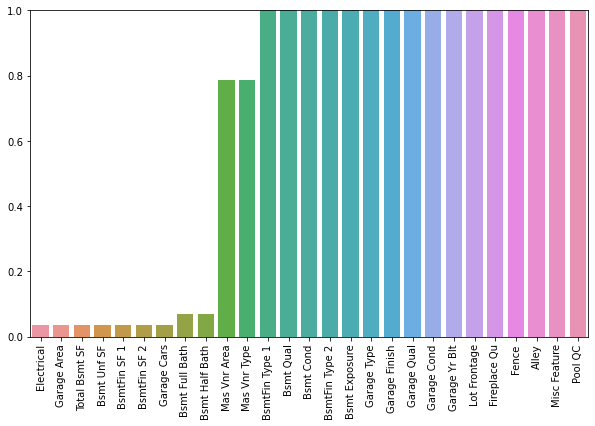

In [60]:
# Let's first start with the columns with less than 1% missing values

percent_nan = percent_missing(df)

plt.figure(figsize = (10, 6))
sns.barplot(x = percent_nan.index, y = percent_nan)  # percent_nan, previously derived
plt.xticks(rotation = 90)
plt.ylim(0,1)  # Since the y axis is in percentage, we have chosen missing data less than 1%. 

In [61]:
# In this arbitrary threshold of 1%, If we are working on categorical nominal variable, it is good to drop those columns. Because later, when we start creating dummies for those categories we will create a new column for 1% of rows.
# Starting with Electrical column, it is an ordinal feature, so we can replace the null values with "None"

df['Electrical'] = df['Electrical'].fillna("None")

In [62]:
# Garage Area and Garage Cars

df[df['Garage Area'].isnull()].index == df[df['Garage Cars'].isnull()].index

# If there is no garage, then no cars

array([ True])

In [63]:
df["Garage Cars"].value_counts()

2.0    1602
1.0     778
3.0     371
0.0     157
4.0      16
5.0       1
Name: Garage Cars, dtype: int64

In [64]:
df['Garage Area'].min()

0.0

In [65]:
# There are zero values in garage area and garage cars already
# So, the data is added here. Let's drop this row

df = df.dropna(axis = 0, subset = ['Garage Area'])

# Garage Area missing values are also dropped by default

In [66]:
# Bsmt Full Bath and Bsmt Half Bath

df[df['Bsmt Full Bath'].isnull()].index == df[df['Bsmt Half Bath'].isnull()].index

# Same rows are missing in both the columns.

array([ True,  True])

In [67]:
print(df['Bsmt Full Bath'].value_counts())
print(df['Bsmt Half Bath'].value_counts())
print(df.shape)

# Both of them have zero values already.

0.0    1705
1.0    1179
2.0      37
3.0       2
Name: Bsmt Full Bath, dtype: int64
0.0    2749
1.0     170
2.0       4
Name: Bsmt Half Bath, dtype: int64
(2925, 81)


In [68]:
# let's drop these missing rows

df = df.dropna(axis = 0, subset = ['Bsmt Full Bath'])

(0.0, 1.0)

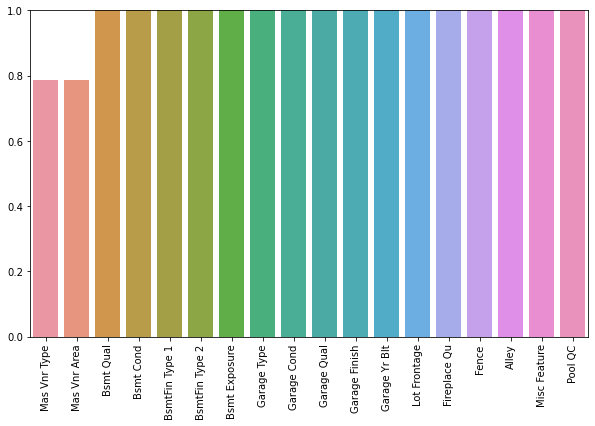

In [69]:
# Let's check what all features left for us to deal

percent_nan = percent_missing(df)

plt.figure(figsize = (10, 6))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [70]:
# Mas Vnr Type and Mas Vnr Area are left.

df[df["Mas Vnr Type"].isnull()].index == df[df["Mas Vnr Type"].isnull()].index

# Same missing rows in both the columns.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [71]:
# Mas Vnr Type is a categorical column; Nominal variable

df["Mas Vnr Type"].value_counts()

# None is already present

None       1749
BrkFace     879
Stone       246
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [72]:
df["Mas Vnr Area"].min()

# Zero is already present in this column

0.0

In [73]:
# Let's drop the missing values

df = df.dropna(axis = 0, subset = ["Mas Vnr Type"])

Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
BsmtFin Type 2     2.724138
Bsmt Exposure      2.793103
Garage Type        5.379310
Garage Yr Blt      5.413793
Garage Finish      5.413793
Garage Qual        5.413793
Garage Cond        5.413793
Lot Frontage      16.655172
Fireplace Qu      48.655172
Fence             80.344828
Alley             93.241379
Misc Feature      96.379310
Pool QC           99.586207
dtype: float64

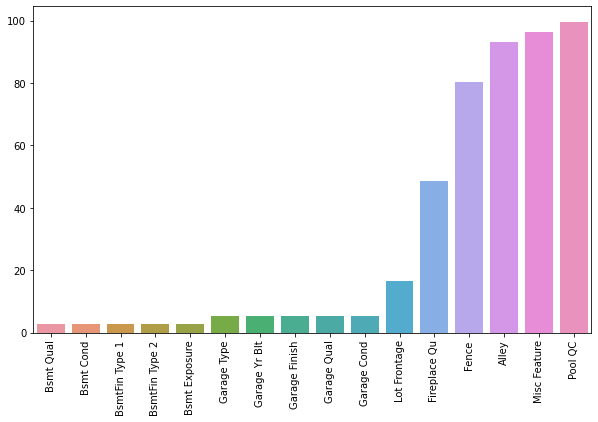

In [74]:
# Let's check what all features left for us to deal

percent_nan = percent_missing(df)

plt.figure(figsize = (10, 6))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

percent_nan

# We have dropped some rows where few features have Null values, and the same features already contain 'None' or 0 values in them. So, there won't be any problem for the future predictions.
# We could have filled None for missing data in categorical columns and 0 for continous columns, even though they are already present, as it is a reasonable assumption to make.
# But, we understand that the was not added in the first place even though these options are available to added, we didn't want to miss interpret those values and dropped them for those few rows.

In [75]:
# Now that we have crossed our threshold for dropping the rows, we will fill the rest of the data with proper assumptions.
# While filling the missing feature data, there are some issues...
# We are changing the groud truth in data
# We must have reasonable estimation for filling that
# Must apply this same transformation to all future data for predictions.

In [76]:
# Bsmt Qual, Bsmt Cond, and BsmtFin Type 1

print(df[df['Bsmt Qual'].isnull()].index == df[df["Bsmt Cond"].isnull()].index)
print(df[df['Bsmt Qual'].isnull()].index == df[df["BsmtFin Type 1"].isnull()].index)

# All these three features have missing values in the same rows.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [77]:
print("Missing Values in 'Bsmt Qual':", len(df[df['Bsmt Qual'].isnull()].index))
print("Missing Values in 'BsmtFin Type 2':", len(df[df["BsmtFin Type 2"].isnull()].index))
print("Missing Values in 'Bsmt Exposure':", len(df[df["Bsmt Exposure"].isnull()].index))

Missing Values in 'Bsmt Qual': 78
Missing Values in 'BsmtFin Type 2': 79
Missing Values in 'Bsmt Exposure': 81


In [78]:
print(df['Bsmt Qual'].value_counts())
print(df["Bsmt Cond"].value_counts())
print(df["BsmtFin Type 1"].value_counts())
print(df["BsmtFin Type 2"].value_counts())
print(df["Bsmt Exposure"].value_counts())

# No category assigned when there is no basement for all the categorical columns above.
# Also, all the above features are ordinal, so later we can do integer encoding. (We don't have to increase the no. of features by using one-hot encoding.)

TA    1282
Gd    1202
Ex     248
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64
TA    2590
Gd     120
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
GLQ    844
Unf    840
ALQ    428
Rec    287
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64
Unf    2472
Rec     106
LwQ      89
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFin Type 2, dtype: int64
No    1886
Av     414
Gd     280
Mn     239
Name: Bsmt Exposure, dtype: int64


In [79]:
# Replacing all the Nan values with None

df[['Bsmt Qual', "Bsmt Cond", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Exposure"]] = df[['Bsmt Qual', "Bsmt Cond", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Exposure"]].fillna("None", axis = 0)

Garage Type       5.379310
Garage Yr Blt     5.413793
Garage Finish     5.413793
Garage Qual       5.413793
Garage Cond       5.413793
Lot Frontage     16.655172
Fireplace Qu     48.655172
Fence            80.344828
Alley            93.241379
Misc Feature     96.379310
Pool QC          99.586207
dtype: float64

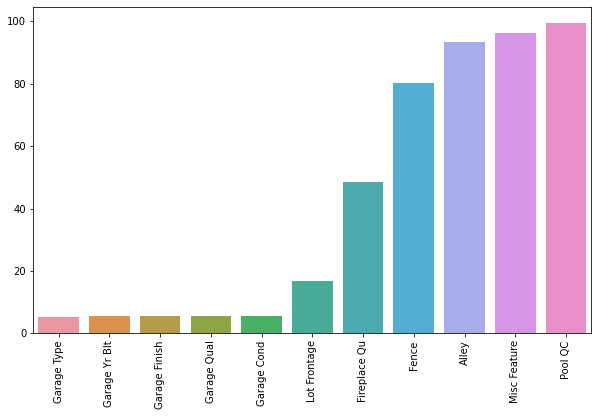

In [80]:
# Let's check what all features left for us to deal

percent_nan = percent_missing(df)

plt.figure(figsize = (10, 6))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

percent_nan

In [81]:
# Few columns related Garage are having missing values. Let's check that

print("Missing Values in 'Garage Type':", len(df[df['Garage Type'].isnull()].index))
print("Missing Values in 'Garage Yr Blt':", len(df[df["Garage Yr Blt"].isnull()].index))
print("Missing Values in 'Garage Finish':", len(df[df["Garage Finish"].isnull()].index))
print("Missing Values in 'Garage Qual':", len(df[df["Garage Qual"].isnull()].index))
print("Missing Values in 'Garage Cond':", len(df[df["Garage Cond"].isnull()].index))

Missing Values in 'Garage Type': 156
Missing Values in 'Garage Yr Blt': 157
Missing Values in 'Garage Finish': 157
Missing Values in 'Garage Qual': 157
Missing Values in 'Garage Cond': 157


In [82]:
# All the below values are having same missing values, let's check if all the rows are same or not
# If the value are more than 0, some values are not matching

print((df[df['Garage Yr Blt'].isnull()].index != df[df["Garage Finish"].isnull()].index).sum())
print((df[df['Garage Yr Blt'].isnull()].index != df[df["Garage Qual"].isnull()].index).sum())
print((df[df['Garage Yr Blt'].isnull()].index != df[df["Garage Cond"].isnull()].index).sum())

0
0
0


In [83]:
# In that one row, where Garage Type column has a value.

df[(df['Garage Yr Blt'].isnull()) & (df["Garage Type"].notnull())][["Garage Type", 'Garage Yr Blt', "Garage Finish", "Garage Qual", "Garage Cond"]]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,NaN,NaN


In [84]:
print("All the categorical columns with few missing values...")
print(df['Garage Type'].value_counts())
print(df["Garage Finish"].value_counts())
print(df["Garage Qual"].value_counts())
print(df["Garage Cond"].value_counts())

All the categorical columns with few missing values...
Attchd     1708
Detchd      780
BuiltIn     182
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64
Unf    1227
RFn     803
Fin     713
Name: Garage Finish, dtype: int64
TA    2587
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64
TA    2637
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64


In [85]:
# Replacing all the missing values in categorical columns related to Garage with None.

df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna("None")

In [86]:
# For the continous column, which is actually as categorical column with a lot of categories in years.
# There is NO GARAGE because, it was never built, thus Nan values at year of building garage

print(df["Garage Yr Blt"].value_counts())

# Let's replace this 0, even though it doesn't represent zeroth year, when we consider this feature to be oridinal feature our model will use it some assumptions.

None      157
2005.0    141
2006.0    112
2007.0    107
2004.0     99
         ... 
1896.0      1
1919.0      1
1933.0      1
1943.0      1
1895.0      1
Name: Garage Yr Blt, Length: 103, dtype: int64


In [87]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

# There are "None" strings in Garage Yr Blt column, let's replace them with Zeroes

df["Garage Yr Blt"] = df["Garage Yr Blt"].replace({"None":0})

Lot Frontage    16.655172
Fireplace Qu    48.655172
Fence           80.344828
Alley           93.241379
Misc Feature    96.379310
Pool QC         99.586207
dtype: float64

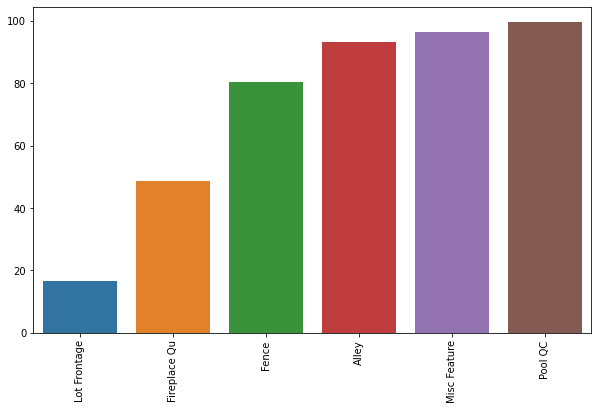

In [88]:
# Let's check what all features left for us to deal

percent_nan = percent_missing(df)

plt.figure(figsize = (10, 6))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

percent_nan

In [89]:
# Let's start with Pool QC: ORDINAL VARIABLE

df[df['Pool Area']>0].index == df[df['Pool QC'].notnull()].index

# No pool, No Pool QC

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

<AxesSubplot:xlabel='Pool QC', ylabel='SalePrice'>

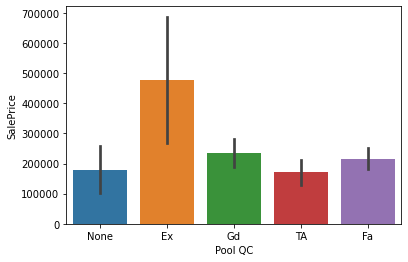

In [90]:
sns.barplot(x = "Pool QC", y = "SalePrice", data = df[["SalePrice", "Pool QC"]].fillna("None"), estimator = np.mean, ci = 'sd')

# The value Quality of Pool is greatly affecting our label, so we will retain it.

In [91]:
# Replacing Pool QC missing values with None

df["Pool QC"] = df["Pool QC"].fillna("None")



In [92]:
# Misc Feature: NOMINAL VARIABLE

df["Misc Feature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: Misc Feature, dtype: int64

<AxesSubplot:xlabel='Misc Feature', ylabel='SalePrice'>

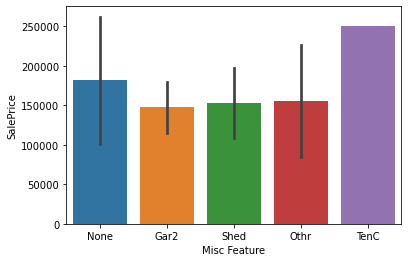

In [93]:
sns.barplot(x = "Misc Feature", y = "SalePrice", data = df[["SalePrice", "Misc Feature"]].fillna("None"), estimator = np.mean, ci = 'sd')

# Presence of Tenis court is affectingthe price a lot, a lot of values of missing. But, if we drop them might not predict the future data with these features properly.

In [94]:
# Replacing Misc Feature missing values with None

df["Misc Feature"] = df["Misc Feature"].fillna("None")

In [95]:
# Alley: ORDINAL VARIABLE

df["Alley"].value_counts()

Grvl    120
Pave     76
Name: Alley, dtype: int64

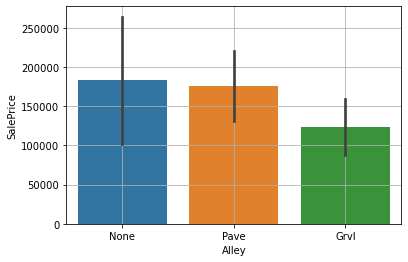

In [96]:
sns.barplot(x = "Alley", y = "SalePrice", data = df[["SalePrice", "Alley"]].fillna("None"), estimator = np.mean, ci = 'sd')

plt.grid()

# Alley access with gravel pavement is having large price difference with no alley access, let's retain this feature too.

In [97]:
# Replacing Alley missing values with None

df["Alley"] = df["Alley"].fillna("None")

In [98]:
# Fence: ORDINAL VARIABLE
# No Fence, No value assigned. almost 20% of the values are present.

df["Fence"].value_counts()

MnPrv    328
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [99]:
# Replacing the missing values with None as it is Ordinal variable too.

df["Fence"] = df["Fence"].fillna("None")

In [100]:
# Fireplace Qu: ORDINAL VARIABLE

df['Fireplace Qu'].value_counts()

# No fire place, no Fireplace Quality

Gd    730
TA    595
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [101]:
# Replacing Fireplace Qu missing values with None

df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

In [102]:
# Lot Frontage: Continuous Feature

df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2900, dtype: float64

In [103]:
# We will use a statistical estimation based off of another column to fill these values.
# If check the feature descriptions...

# Neighborhood: Physical locations within Ames city limits
# Lot Frontage: Linear feet of street connected to property

# Both these features are related to each other. And Neighboorhood is a categorical column

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

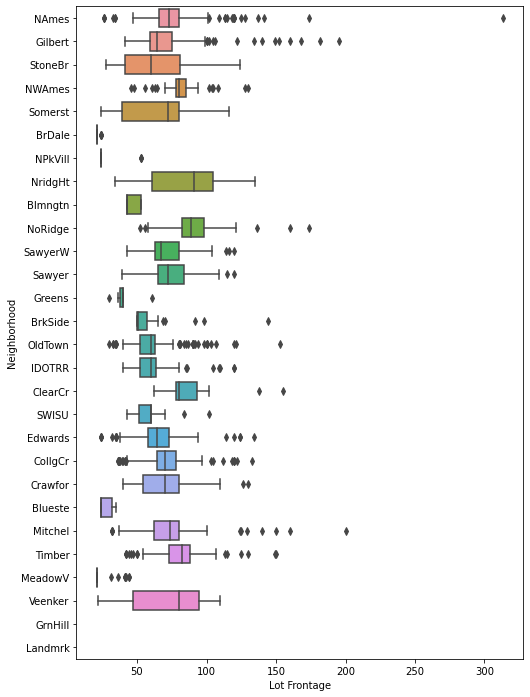

In [104]:
# Let's see the distribution of Lot Frontage among categories of Neighborhood.

plt.figure(figsize = (8, 12))
sns.boxplot(x = "Lot Frontage", y = "Neighborhood", data = df, orient = 'h')

# This may not help us to understand if they are related to each other or not.
# But, our assumption is made on domain knowledge that they would be related.

In [105]:
df.groupby("Neighborhood")['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.325688
Crawfor    69.951807
Edwards    64.398844
Gilbert    74.345455
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    83.925466
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.704762
Somerst    64.111111
StoneBr    62.173913
Timber     81.392857
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [106]:
# We can create a for loop and replace this data or there is a built-in pandas transform method to do this.

help(df.transform)

Help on method transform in module pandas.core.frame:

transform(func: 'AggFuncType', axis: 'Axis' = 0, *args, **kwargs) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Call ``func`` on self producing a DataFrame with transformed values.
    
    Produced DataFrame will have same axis length as self.
    
    Parameters
    ----------
    func : function, str, list-like or dict-like
        Function to use for transforming the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply. If func
        is both list-like and dict-like, dict-like behavior takes precedence.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list-like of functions and/or function names, e.g. ``[np.exp, 'sqrt']``
        - dict-like of axis labels -> functions, function names or list-like of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function 

In [107]:
df.groupby("Neighborhood")['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

# If we just write 'mean' inside transform, there will be a new series with mean value for corresponding categories in Neighborhood column for all the rows.
# If the value is Nan, then to fill that Nan value, we use mean function.

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2900, dtype: float64

In [108]:
df['Lot Frontage'] = df.groupby("Neighborhood")['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [109]:
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage    3
dtype: int64

In [110]:
df[df["Lot Frontage"].isnull()][["Neighborhood", "Lot Frontage"]]

,Neighborhood,Lot Frontage
2256,GrnHill,NaN
2788,Landmrk,NaN
2892,GrnHill,NaN


In [111]:
# Let's assume that there is not Lot Frontage for these Neighborhood areas

df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [112]:
df.isnull().sum()[df.isnull().sum()>0]

# No more missing values

Series([], dtype: int64)

In [113]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


In [114]:
# PID column is unique identifier of the rows, and it's not a feature of the data. So, we can drop it.

df = df.drop(columns = "PID")

## Dealing with Categorical Data

In [115]:
# Coming to the categorical columns, the data types of categorical columns can be in numeric datatypes and also in object datatypes.
# These categorical columns can be ordinal and nominal

# Even though, the dtypes can be in numeric and object dtypes, most of them are likely to be in object datatypes.
# And, all the continous columns are in numeric datatypes. So, let's first divide our dataframe based on dtypes.

obj_df = df.select_dtypes(include='object').copy()

num_df = df.select_dtypes(exclude = 'object').copy()

In [116]:
# After checking the feature descriptions of all the columns, I have divided the columns as follows.

# Ordinal Columns #
ord_cols = ['MS SubClass', 'Alley', 'Lot Shape', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond',
            'Bsmt Qual', 'Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical',
            'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
            'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Finish', 'Garage Cars','Garage Qual', 'Garage Cond',
            'Paved Drive', 'Pool QC', 'Fireplace Qu']

# If there are only two categories in a categorical column, it can be nominal and ordinal both. Let's consider it as nominal
# Nominal Columns #
nom_cols = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2',
            'Bldg Type', 'House Style', 'Roof Style','Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
            'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Fence', 'Mo Sold', 'Sale Type', 'Sale Condition', 'Misc Feature']
# "Utilities" column needs some feature engineering. This column should be divided into 4 columns("E", "G", "W", "S")
# for rows with "AllPub", "E":1, "G":1, "W":1, "S":1. for rows with NoSewr "S":0, for rows with NoSeWa "S":0 and "W":0. for rows with ELO only "E":1.
# After that, it should you added to nominal columns or the final data frame

# Continuous Columns #
cont_cols = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
             'Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Yr Blt', 'Garage Area',
             'Wood Deck SF', 'Open Porch SF', 'Screen Porch', 'Pool Area', 'Misc Val', 'Yr Sold',
             'Mas Vnr Area', 'Enclosed Porch', '3Ssn Porch', 'SalePrice']

# Creating respective dataframes

ord_df = df[ord_cols]
nom_df = df[nom_cols]
cont_df = df[cont_cols]

# let's first start with Utilities column

In [117]:
# ELO is not present in our data
# After removing ELO, GAS has 1s for all th rows, after removing that.
# We need to find only Water and Sewage only

util_ser = df["Utilities"].copy()

def water(util):
    if util == "NoSeWa":
        return 0
    else:
        return 1

def sewage(util):
    if util=="AllPub":
        return 1
    else:
        return 0


water_ser = util_ser.apply(water)
sewage_ser = util_ser.apply(sewage)

util_df = pd.DataFrame({"Water": water_ser, "Sewage": sewage_ser})   ###################################

In [118]:
################# Ordinal Series ########################
################ Integer Encoding #######################

# 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars'
# The above list of columns already integer encoded

qual = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

int_enc = {'Alley':{"None":0, "Grvl":1, "Pave":2}, 'Lot Shape':{"IR3":0, "IR2":1, "IR1":2, "Reg":3},
           'Land Slope':{"Sev":0, "Mod":1, "Gtl":2},'Exter Qual':qual,
           'Exter Cond': qual, 'Bsmt Qual':qual,
           'Bsmt Cond':qual, 'Bsmt Exposure':{"None":0, "No":1, "Mn":2, "Av":3, "Gd":4},
           'BsmtFin Type 1': {'None':0, 'Unf':1, 'LwQ':2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}, 'BsmtFin Type 2': {'None':0, 'Unf':1, 'LwQ':2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6},
           'Heating QC': qual, 'Electrical': {"None":0, "Mix":1, "FuseP":2, "FuseF":3, "FuseA":4, "SBrkr":5},
           'Kitchen Qual': qual, 'Functional':{"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7},
           'Garage Finish': {"None":0, "Unf":1, "RFn":2, "Fin":3}, 'Garage Qual': qual,
           'Garage Cond': qual, 'Paved Drive': {"N":0, "P":1, "Y":2}, 'Pool QC':qual, 'Fireplace Qu':qual}

# Mapping the above dictionary to our ord_df to perform integer encoding

ord_df = ord_df.replace(int_enc)

In [119]:
################# Nominal Series ########################
################ One-hot Encoding #######################

# For column Mo Sold, month sold is does not define the sale price in a linear fashion, let's convert it into Month Names

import calendar

nom_df['Mo Sold'] = nom_df['Mo Sold'].apply(lambda x: calendar.month_abbr[x])

# Creating dummy features for nominal categorical variables

nom_df = pd.get_dummies(nom_df, drop_first=True)

C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_27504/464196731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nom_df['Mo Sold'] = nom_df['Mo Sold'].apply(lambda x: calendar.month_abbr[x])


In [120]:
# Now, we have to combine our Utilities dataframe, Ordinal Dataframe, Nominal DataFrame, and Continuous DataFrame together.

final_df = pd.concat([util_df, ord_df, nom_df, cont_df],axis = 1)

In [121]:
final_df.shape

# We have 221 features, we don't know all them are useful. Later we will use regualarization to choose the columns.

(2900, 221)

In [122]:
final_df

,Water,Sewage,MS SubClass,Alley,Lot Shape,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fireplace Qu,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Mo Sold_Aug,Mo Sold_Dec,Mo Sold_Feb,Mo Sold_Jan,Mo Sold_Jul,Mo Sold_Jun,Mo Sold_Mar,Mo Sold_May,Mo Sold_Nov,Mo Sold_Oct,Mo Sold_Sep,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Lot Frontage,Lot Area,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Misc Val,Yr Sold,Mas Vnr Area,Enclosed Porch,3Ssn Porch,SalePrice
0,1,1,20,0,2,2,6,5,3,3,3,4,4,4,1,2,5,1.0,0.0,1,0,3,1,3,7,7,2,3,2.0,3,3,1,0,4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,

In [123]:
final_df.to_csv("../DATA/Ames_myfinaldf.csv", index = False)

# Other Encoding Techniques

### Nominal Encoding

- **One hot Encoding**
    - Already learnt
    - when you have a lot of variables in a nominal categorical features, if you perform one-hot encoding.
    - You will get a lot of features i.e. dimension, this creates curse of dimensionality .
    - **Curse of Dimensionality:** the error increases with the increase in the number of features.
- **One hot Encoding with many categorical variables**
    - If we have a lot of categorical value in a column. We will count the values/ frequency of each value and arrange them in descending order, select the top n values (based on the dataset, domain knowledge, and/or reasonable estimation)
    - Then we perform one-hot encoding for these n selected features. We don't drop any columns while performing encoding here. Because, we are already ignoring the rest of the values apart from the top n values. So, wherever the values are zero for all the rows after encoding, those rows will represent the one of the values in the rest of the features.
    
- **Mean Guided Encoding**
    - We will consider the categorical feature and the target column.
    - We will groupby the target column based off of the categorical column with mean as aggregate function.
    - Now, we will replace the corresponding values of the categorical column with it's respective mean in the target column.

### Ordinal Encoding

- **Label Encoding (Integer Encoding)**
    - Already learnt
- **Target Guided Ordinal Encoding**
    - We will take the Ordinal Column and the target column.
    - We will groupby ordinal column and get the mean of the target column
    - Now, we will arrange the ordinal categorical values in ascending order based on the mean values in the target.
    - We will then assign values from 1 to these categorical values and map them in the actual feature column. This also be done for nominal features, as it converts any categorical feature into ordered numerical values.

In [124]:
import string
import random


letters = []
target = []

for i in range(1000):
    letters.append(random.choice(string.ascii_uppercase))
    target.append(random.randint(1, 10000))

In [125]:
new_df = pd.DataFrame(data = {"Letters":letters, "Target":target})

In [126]:
# Let's check how to do all the above encoding techniques for this dataframe

### One-Hot Encoding

In [127]:
pd.get_dummies(new_df, drop_first= True)

,Target,Letters_B,Letters_C,Letters_D,Letters_E,Letters_F,Letters_G,Letters_H,Letters_I,Letters_J,Letters_K,Letters_L,Letters_M,Letters_N,Letters_O,Letters_P,Letters_Q,Letters_R,Letters_S,Letters_T,Letters_U,Letters_V,Letters_W,Letters_X,Letters_Y,Letters_Z
0,2292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,6630,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3237,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,7477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
997,2295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
998,4264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


There are a lot of Featues, this can create a CURSE OF DIMENSIONALITY

### One hot Encoding with many categorical variables

In [128]:
new_df.head()

,Letters,Target
0,X,2292
1,Z,1291
2,T,8032
3,C,6630
4,G,3237


In [129]:
# Here the frequency of all the letters is almost same, and there not a large difference in the frequency.
# But, for the purpose of understanding how to perform this process, let's select top 10 values.

new_df.groupby(by='Letters').count().nlargest(10, 'Target')

,Target
Letters,
Y,51
Z,49
P,45
J,44
S,44
L,43
H,42
A,41
Q,41


In [130]:
# To create columns for these values, we need to grab the index values.
# As the aggregate function is count, it can be performed on any other column, which has no missing values.

new_df.groupby(by='Letters').count().nlargest(10, 'Target').index

Index(['Y', 'Z', 'P', 'J', 'S', 'L', 'H', 'A', 'Q', 'R'], dtype='object', name='Letters')

In [131]:
enc_df = pd.DataFrame()
for label in new_df.groupby(by='Letters').count().nlargest(10, 'Target').index:
    enc_df[label]=np.where(new_df["Letters"]==label, 1, 0)  # Where Letters feature is label, it will add 1 in that label column, else 0.

pd.concat([new_df,enc_df], axis = 1)

,Letters,Target,Y,Z,P,J,S,L,H,A,Q,R
0,X,2292,0,0,0,0,0,0,0,0,0,0
1,Z,1291,0,1,0,0,0,0,0,0,0,0
2,T,8032,0,0,0,0,0,0,0,0,0,0
3,C,6630,0,0,0,0,0,0,0,0,0,0
4,G,3237,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,8815,0,0,0,0,0,0,0,0,0,0
996,Y,7477,1,0,0,0,0,0,0,0,0,0
997,U,2295,0,0,0,0,0,0,0,0,0,0
998,W,4264,0,0,0,0,0,0,0,0,0,0


In [132]:
# If there are some special characterstics or high values for the few data points missing. We might lose that valuable information.
# We can rectify that kind issues with mean guided encoding.

### Mean Guided Encoding

In [133]:
new_df.groupby(by = "Letters").mean()

,Target
Letters,
A,4821.463415
B,5311.297297
C,4763.138889
D,5373.605263
E,4652.303030
F,4545.970588
G,4505.896552
H,4833.714286
I,5126.171429


In [134]:
new_df.groupby(by = "Letters").mean().to_dict()

{'Target': {'A': 4821.463414634146,
  'B': 5311.2972972972975,
  'C': 4763.138888888889,
  'D': 5373.605263157895,
  'E': 4652.30303030303,
  'F': 4545.970588235294,
  'G': 4505.896551724138,
  'H': 4833.714285714285,
  'I': 5126.171428571429,
  'J': 5036.840909090909,
  'K': 5139.815789473684,
  'L': 6051.116279069767,
  'M': 5557.771428571428,
  'N': 5169.4358974358975,
  'O': 5354.827586206897,
  'P': 5499.933333333333,
  'Q': 5353.804878048781,
  'R': 5487.775,
  'S': 4827.272727272727,
  'T': 4689.205128205128,
  'U': 5509.285714285715,
  'V': 3853.7586206896553,
  'W': 4942.1578947368425,
  'X': 4363.166666666667,
  'Y': 5273.490196078431,
  'Z': 5108.244897959184}}

In [135]:
# We don't want our dictionary to have "Target" key, as we are encoding our Letters column, we have remove "Target" and place "Letters"

# Removing "Target" key
mean_enc = new_df.groupby(by = "Letters").mean().to_dict()['Target']

# Now, just like label encoder.

# Placing "Letters" key. As we want to replace those values in Letters columns
new_df.replace({"Letters":mean_enc})

,Letters,Target
0,4363.166667,2292
1,5108.244898,1291
2,4689.205128,8032
3,4763.138889,6630
4,4505.896552,3237
...,...,...
995,4763.138889,8815
996,5273.490196,7477
997,5509.285714,2295
998,4942.157895,4264


In [136]:
# If the mean value of the target is same for two or more different categorical values in the column, our model will consider both the values to be the same.
# We might miss any important information, for any particular values, if exists.
# so, we have to decide on which encoding to use based on advantages and disadvantages based on the problem.

### Label Encoding

In [137]:
# It is same as integer encoding, which we learnt previous. We perform this if the values of the categorical variable is ordinal.
# The letters in new_df["Letters"] are definitely not ordinal. And, we have already seen how to preform this method previously.
# So, we are not going to perform this again.

### Target Guided Ordinal Encoding

In [138]:
# This is similar to Mean Guided Encoding, as the processes are guided by target column.

new_df.groupby("Letters").mean().sort_values(by = "Target", ascending = True)

,Target
Letters,
V,3853.758621
X,4363.166667
G,4505.896552
F,4545.970588
E,4652.303030
T,4689.205128
C,4763.138889
A,4821.463415
S,4827.272727


In [139]:
# Now, we will take the index values in the same order and assign values to it

tg_enc={}
v = 1

for k in new_df.groupby("Letters").mean().sort_values(by = "Target", ascending = True).index:
    tg_enc[k]= v
    v+=1

tg_enc

{'V': 1,
 'X': 2,
 'G': 3,
 'F': 4,
 'E': 5,
 'T': 6,
 'C': 7,
 'A': 8,
 'S': 9,
 'H': 10,
 'W': 11,
 'J': 12,
 'Z': 13,
 'I': 14,
 'K': 15,
 'N': 16,
 'Y': 17,
 'B': 18,
 'Q': 19,
 'O': 20,
 'D': 21,
 'R': 22,
 'P': 23,
 'U': 24,
 'M': 25,
 'L': 26}

In [140]:
# Now, let's replace these values

new_df.replace({"Letters":tg_enc})

,Letters,Target
0,2,2292
1,13,1291
2,6,8032
3,7,6630
4,3,3237
...,...,...
995,7,8815
996,17,7477
997,24,2295
998,11,4264


In [141]:
##################################################################################

# Other Techniques are mentioned in the other notebooks